# Árvore de decisão


Ilustra o funcionamento do algoritmo de árvore de decisão com atributos numéricos.

Este notebook foi desenvolvido para o ambiente GOOGLE COLAB ([colab.research.google.com](https://colab.research.google.com)).

Prof. Hugo de Paula

-------------------------------------------------------------------------------

### Base de dados: Iris dataset (espécies de lírios)

https://archive.ics.uci.edu/ml/datasets/Iris/

3 classes (setosa, virginica, versicolor)

50 amostras por classe

4 atributos reais positivos (comp. pétala, comp. sépala, larg. pétala, larg. sépala)




In [2]:
!pip install pydotplus
!pip install dtreeviz

In [3]:
import pandas as pd
from sklearn import datasets, tree
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.feature_extraction import DictVectorizer
from sklearn.preprocessing import LabelEncoder
import numpy as np
import matplotlib.pyplot as plt

In [4]:
np.set_printoptions(threshold=None, precision=2)

In [5]:
iris = datasets.load_iris()

X, y = iris.data, iris.target
class_names = iris.target_names

X_train, X_teste, y_train, y_test = train_test_split(
    X, y, random_state=0, test_size=0.15, stratify=y)

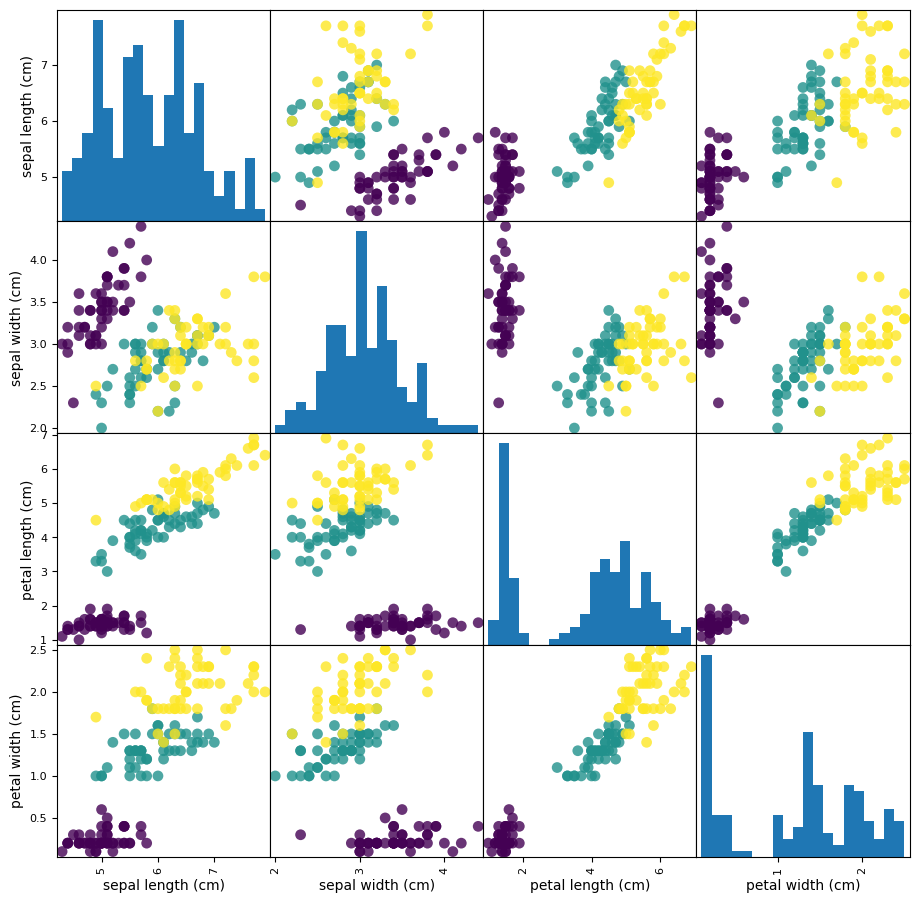

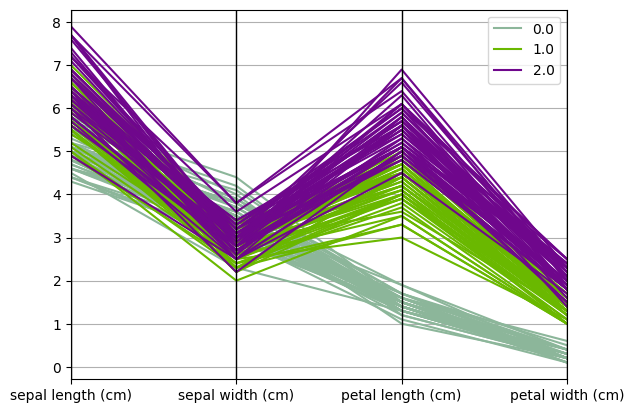

In [6]:
iris_dataframe = pd.DataFrame(np.c_[iris['data'], iris['target']], columns=np.append(
    iris['feature_names'], 'target'))

ax2 = pd.plotting.scatter_matrix(iris_dataframe.iloc[:, :4], figsize=(
    11, 11), c=y, marker='o', hist_kwds={'bins': 20}, s=60, alpha=.8)

plt.figure()

ax3 = pd.plotting.parallel_coordinates(iris_dataframe, 'target')

In [7]:
tree_iris = DecisionTreeClassifier(
    random_state=0, criterion='entropy', class_weight={0: 1, 1: 1, 2: 1})
tree_iris = tree_iris.fit(X_train, y_train)

print(tree_iris.score(X_train, y_train))

y_pred = tree_iris.predict(X_teste)
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred, target_names=iris.target_names))

cnf_matrix = confusion_matrix(y_test, y_pred)
cnf_table = pd.DataFrame(data=cnf_matrix, index=iris.target_names, columns=[
                         x+"(prev)"for x in iris.target_names])
print(cnf_table)

1.0
0.9565217391304348
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00         8
  versicolor       0.89      1.00      0.94         8
   virginica       1.00      0.86      0.92         7

    accuracy                           0.96        23
   macro avg       0.96      0.95      0.95        23
weighted avg       0.96      0.96      0.96        23

            setosa(prev)  versicolor(prev)  virginica(prev)
setosa                 8                 0                0
versicolor             0                 8                0
virginica              0                 1                6


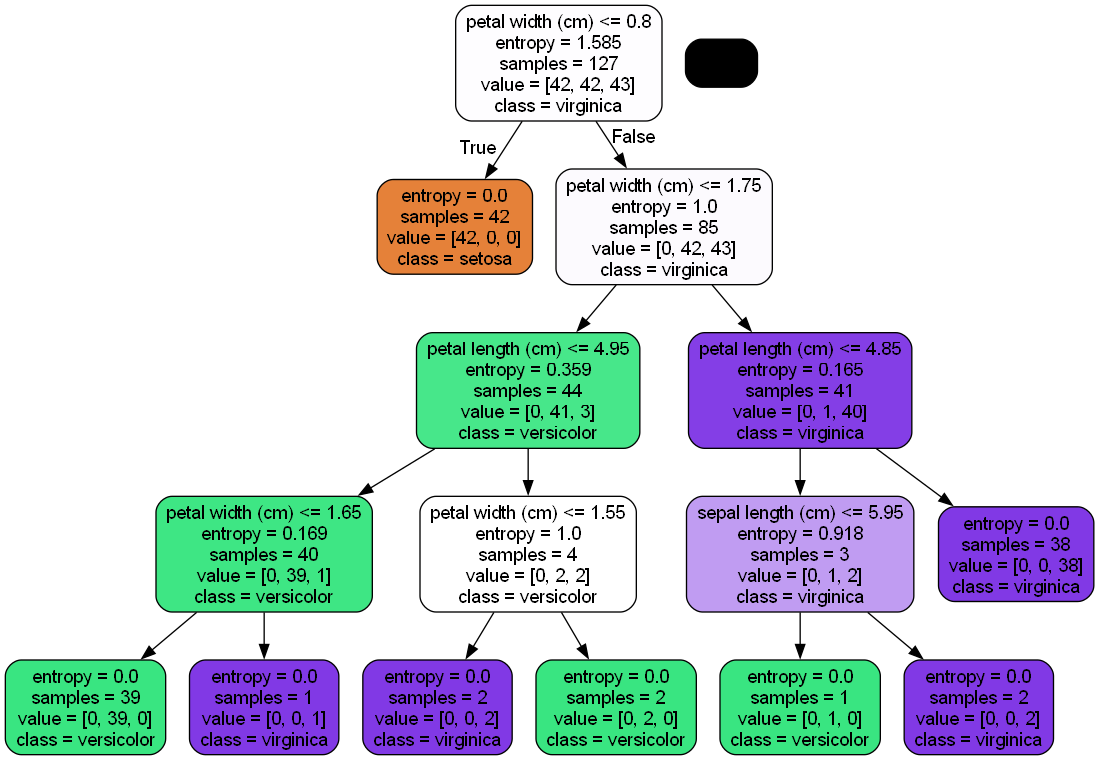

In [9]:
import pydotplus
from IPython.display import Image

dot_data = tree.export_graphviz(tree_iris, out_file=None, rounded=True, filled=True,
                                feature_names=iris.feature_names, class_names=['setosa', 'versicolor', 'virginica'])

graph = pydotplus.graph_from_dot_data(dot_data)

Image(graph.create_png())

In [11]:
importances = list = (
    zip(iris['feature_names'], tree_iris.feature_importances_))
print(importances)